In [1]:
import numpy as np
import cPickle
import gzip
from sklearn import svm
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import time

In [2]:
def read_mnist(mnist_file):
    """
    Reads MNIST data.
    
    Parameters
    ----------
    mnist_file : string
        The name of the MNIST file (e.g., 'mnist.pkl.gz').
    
    Returns
    -------
    (train_X, train_Y, val_X, val_Y, test_X, test_Y) : tuple
        train_X : numpy array, shape (N=50000, d=784)
            Input vectors of the training set.
        train_Y: numpy array, shape (N=50000)
            Outputs of the training set.
        val_X : numpy array, shape (N=10000, d=784)
            Input vectors of the validation set.
        val_Y: numpy array, shape (N=10000)
            Outputs of the validation set.
        test_X : numpy array, shape (N=10000, d=784)
            Input vectors of the test set.
        test_Y: numpy array, shape (N=10000)
            Outputs of the test set.
    """
    f = gzip.open(mnist_file, 'rb')
    train_data, val_data, test_data = cPickle.load(f)
    f.close()
    
    train_X, train_Y = train_data
    val_X, val_Y = val_data
    test_X, test_Y = test_data    
    
    return train_X, train_Y, val_X, val_Y, test_X, test_Y

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Đọc dữ liệu từ MNIST

In [4]:
# Test
train_X, train_Y, val_X, val_Y, test_X, test_Y = read_mnist('mnist.pkl.gz')

print 'train_X.shape =', train_X.shape
print 'train_Y.shape =', train_Y.shape
print 'val_X.shape   =', val_X.shape
print 'val_Y.shape   =', val_Y.shape
print 'test_X.shape  =', test_X.shape
print 'test_Y.shape  =', test_Y.shape

print '\ntrain_X: min = %.3f, max = %.3f' %(train_X.min(), train_X.max())
print 'train_Y: min = %d, max = %d' %(train_Y.min(), train_Y.max())

train_X.shape = (50000L, 784L)
train_Y.shape = (50000L,)
val_X.shape   = (10000L, 784L)
val_Y.shape   = (10000L,)
test_X.shape  = (10000L, 784L)
test_Y.shape  = (10000L,)

train_X: min = 0.000, max = 0.996
train_Y: min = 0, max = 9


## 1. Huấn luyện SVM không dùng kernel
Với các tham số như sau:
+ Phân 10 lớp bằng cách “one-against-one”
+ Sử dụng kernel là linear
+ Tham số C = 1.0

In [5]:
clf = svm.SVC(decision_function_shape='ovo',kernel='linear')
clf.fit(train_X, train_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Đánh giá trên bộ dữ liệu train $E_{in}$

In [6]:
predict_train = clf.predict(train_X)
result_train = confusion_matrix(predict_train,train_Y)

Evaluation: 
(array([ 0.99695864,  0.99454033,  0.97181965,  0.95922368,  0.9777732 ,
        0.95539281,  0.99131489,  0.97198068,  0.95043371,  0.95068164]), array([ 0.98794454,  0.98294169,  0.96656657,  0.95603751,  0.96801141,
        0.96524664,  0.98931667,  0.97461732,  0.96782334,  0.96382114]), array([ 0.99243112,  0.98870699,  0.96918599,  0.95762795,  0.97286782,
        0.96029445,  0.99031477,  0.97329721,  0.9590497 ,  0.9572063 ]), array([4977, 5745, 4995, 5118, 4908, 4460, 4961, 5161, 4755, 4920], dtype=int64))


### Kết quả

Precision, recall và fscore

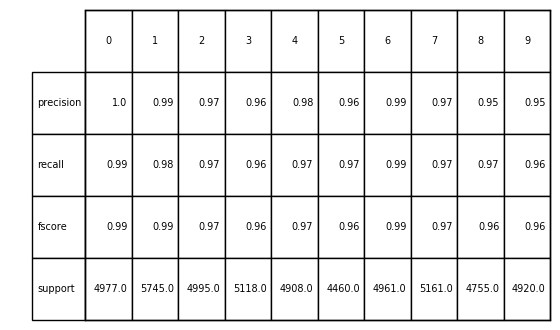

In [45]:
plt.figure()
the_table = plt.table(cellText=np.round(precision_recall_fscore_support(predict_train,train_Y),2),
                      rowLabels=["precision","recall","fscore","support"],
                      colLabels=range(10),
                     bbox=[0,0,1,1])

ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Confusion Matrix

Confusion matrix, without normalization


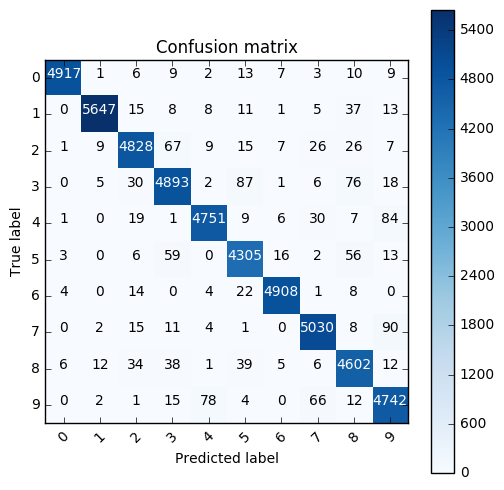

In [7]:
plt.figure(figsize=(5,5))
plot_confusion_matrix(result_train,range(10),normalize=False)
plt.show()

## Đánh giá trên bộ dữ liệu validation $E_{val}$

In [8]:
predict_val = clf.predict(val_X)
result_val = confusion_matrix(predict_val,val_Y)

Evaluation: 
(array([ 0.97578204,  0.98778195,  0.94949495,  0.92330097,  0.95116989,
        0.89508197,  0.96690796,  0.95412844,  0.90683845,  0.90530697]), array([ 0.96410768,  0.95113122,  0.93439364,  0.90571429,  0.94349142,
        0.9140625 ,  0.96690796,  0.95764273,  0.9423275 ,  0.94054054]), array([ 0.96990973,  0.96911019,  0.94188377,  0.91442308,  0.9473151 ,
        0.90447267,  0.96690796,  0.95588235,  0.92424242,  0.92258749]), array([1003, 1105, 1006, 1050,  991,  896,  967, 1086,  971,  925], dtype=int64))


### Kết quả

Precision, recall và fscore

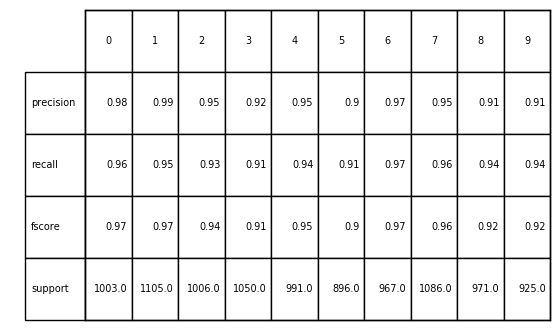

In [46]:
plt.figure()
the_table = plt.table(cellText=np.round(precision_recall_fscore_support(predict_val,val_Y),2),
                      rowLabels=["precision","recall","fscore","support"],
                      colLabels=range(10),
                     bbox=[0,0,1,1])
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Confusion matrix

Confusion matrix, without normalization


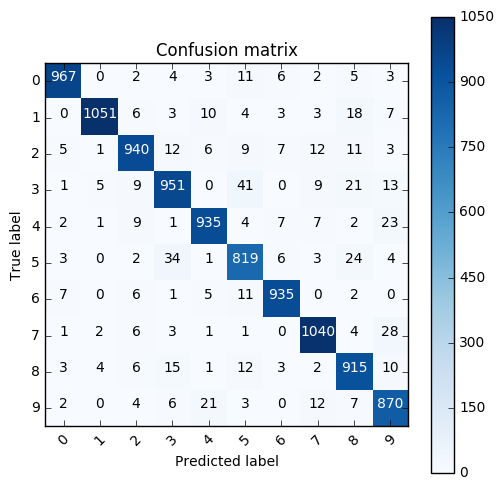

In [9]:
plt.figure(figsize=(5,5))
plot_confusion_matrix(result_val,range(10),normalize=False)
plt.show()

## 2. Huấn luyện SVM dùng RBF kernel
Với các tham số như sau:
+ Phân 10 lớp bằng cách “one-against-one”
+ Sử dụng kernel là RBF
+ Tham số C = 1.0

In [6]:
rbf_svc = svm.SVC(decision_function_shape='ovo',kernel='rbf')
rbf_svc.fit(train_X, train_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
predict_train_rbf = rbf_svc.predict(train_X)
result_train_rbf = confusion_matrix(predict_train_rbf,train_Y)

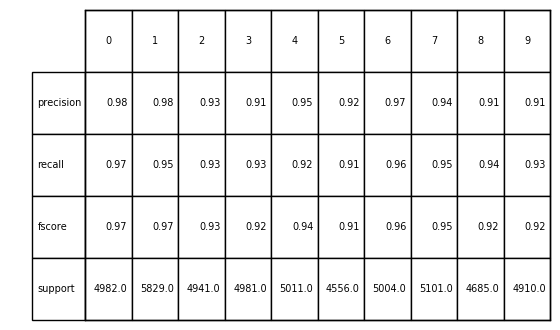

In [15]:
plt.figure()
the_table = plt.table(cellText=np.round(precision_recall_fscore_support(predict_train_rbf,train_Y),2),
                      rowLabels=["precision","recall","fscore","support"],
                      colLabels=range(10),
                     bbox=[0,0,1,1])

ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Confusion matrix, without normalization


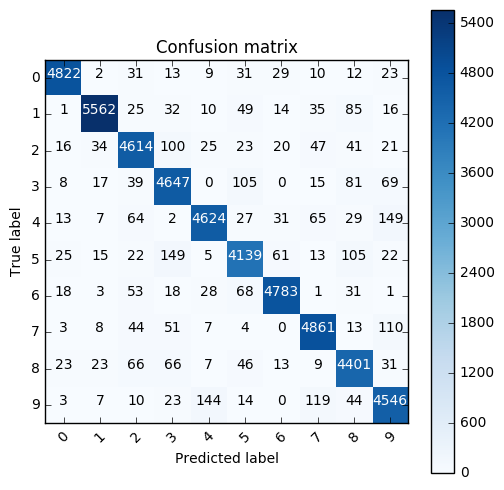

In [9]:
plt.figure(figsize=(5,5))
plot_confusion_matrix(result_train_rbf,range(10),normalize=False)
plt.show()

In [10]:
predict_val_rbf = rbf_svc.predict(val_X)
result_val_rbf = confusion_matrix(predict_val_rbf,val_Y)

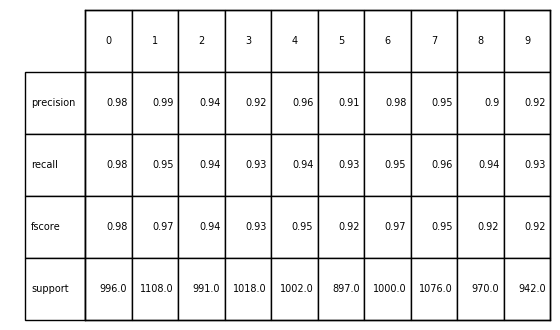

In [14]:
plt.figure()
the_table = plt.table(cellText=np.round(precision_recall_fscore_support(predict_val_rbf,val_Y),2),
                      rowLabels=["precision","recall","fscore","support"],
                      colLabels=range(10),
                     bbox=[0,0,1,1])
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Confusion matrix, without normalization


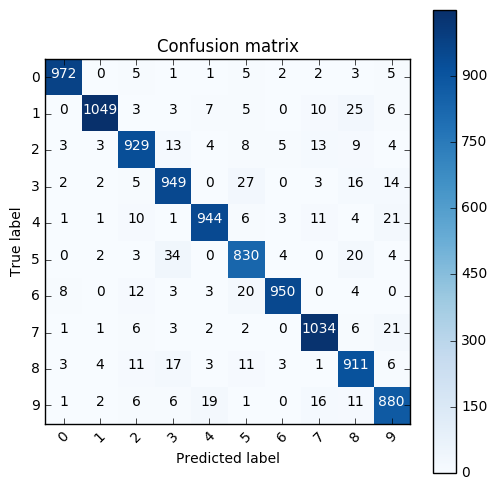

In [11]:
plt.figure(figsize=(5,5))
plot_confusion_matrix(result_val_rbf,range(10),normalize=False)
plt.show()

# Thử trên nhiều C đối với phương pháp linear kernel
Thử trên các giá trị tăng dần theo cấp số mũ 10

In [5]:
linear_kernel_classifier = [svm.SVC(C = 0.01*(10**i), decision_function_shape='ovo',kernel='linear') for i in range(5)]
run_time_linear = []
for classifier in linear_kernel_classifier:
    start_time = time.time()
    classifier.fit(train_X, train_Y)
    end_time = time.time()
    run_time_linear.append(end_time - start_time)

### Đánh giá trên bộ train

In [6]:
result_train = []
for classifier in linear_kernel_classifier:
    predict_train = classifier.predict(train_X)
    result_train.append(precision_recall_fscore_support(predict_train,train_Y))

Đánh giá trên giá trị F-score

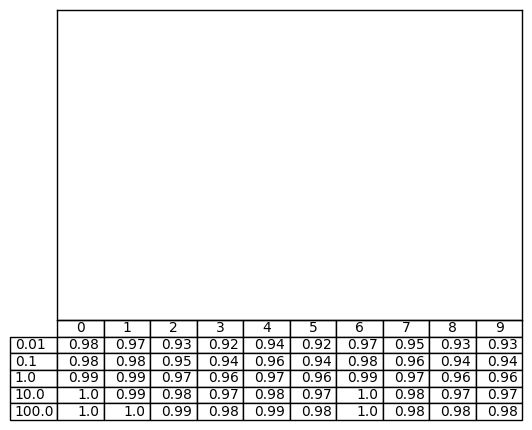

In [7]:
fscore_train = [row[2] for row in result_train]
plt.figure()
the_table = plt.table(cellText=np.round(fscore_train,2),
                      rowLabels=[0.01*(10**i) for i in  range(5)],
                      colLabels=range(10))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.show()

### Đánh giá trên bộ validation

In [8]:
result_val = []
for classifier in linear_kernel_classifier:
    predict_val = classifier.predict(val_X)
    result_val.append(precision_recall_fscore_support(predict_val,val_Y))

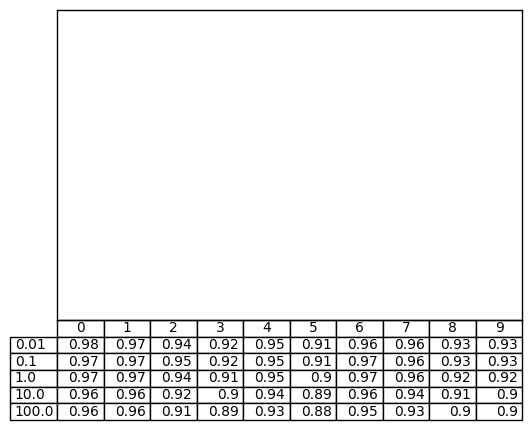

In [9]:
fscore_val = [row[2] for row in result_val]
plt.figure()
the_table = plt.table(cellText=np.round(fscore_val,2),
                      rowLabels=[0.01*(10**i) for i in  range(5)],
                      colLabels=range(10))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [ ]:
cPickle.dump(linear_kernel_classifier,open("linear_kernel_classifier.pickle","wb"))
cPickle.dump(run_time_linear,open("run_time_linear.pickle","wb"))
cPickle.dump(result_train,open("result_train.pickle","wb"))
cPickle.dump(result_val,open("result_val.pickle","wb"))

# Thử trên nhiều C đối với phương pháp RBF kernel
Thử trên các giá trị tăng dần theo cấp số mũ 10

In [ ]:
rbf_kernel_classifier = [[svm.SVC(C = 0.01*(10**i), gamma = 0.01*(10**j),decision_function_shape='ovo',kernel='rbf') for i in range(5)] for j in range(5)]
run_time_rbf = [[] for i in range(5)] 
i = 0
for classifier_gamma in rbf_kernel_classifier:
    for classifier in classifier_gamma:
        start_time = time.time()
        classifier.fit(train_X, train_Y)
        end_time = time.time()
        run_time_rbf[i].append(end_time - start_time)
    i = i+1

In [ ]:
result_train_rbf = [[] for i in range(5)] 
i = 0
for classifier_gamma in linear_kernel_classifier:
    for classifier in classifier_gamma:
        predict_train = classifier.predict(train_X)
        result_train_rbf[i].append(precision_recall_fscore_support(predict_train,train_Y))
    i = i+1

In [ ]:
result_val_rbf = [[] for i in range(5)] 
i = 0
for classifier_gamma in linear_kernel_classifier:
    for classifier in classifier_gamma:
        predict_val = classifier.predict(val_X)
        result_val_rbf[i].append(precision_recall_fscore_support(predict_val,val_Y))
    i = i+1

In [ ]:
cPickle.dump(rbf_kernel_classifier,open("rbf_kernel_classifier.pickle","wb"))
cPickle.dump(run_time_rbf,open("run_time_rbf.pickle","wb"))
cPickle.dump(result_train_rbf,open("result_train_rbf.pickle","wb"))
cPickle.dump(result_val_rbf,open("result_val_rbf.pickle","wb"))